## 10-2. Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(x_train_full, y_train_full), (x_test, y_test) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)
# 데이터셋의 크기를 확인합니다.
print(x_train.shape)
print(len(x_val))
print(len(x_test))

65536/57026 [==================================] - 0s 0us/step
(282, 13)
122
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_mean = x_train.mean(axis = 0)
x_train = x_train - train_mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_std = x_train.std(axis = 0)
x_train = x_train / train_std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
x_val = (x_val - train_mean) / train_std
x_test = (x_test - train_mean) / train_std
x_train[:2]

array([[ 1.352437  , -0.48707157,  0.96786091, -0.25328037,  1.19240416,
        -1.36755315,  1.03108934, -1.11265422,  1.63876613,  1.5157534 ,
         0.76512884,  0.45841129,  2.43780095],
       [-0.40787412,  3.7905423 , -1.45044217, -0.25328037, -1.25725715,
         0.82121576, -0.99425626,  2.30593993, -0.5239208 , -0.92919433,
        -1.65921199,  0.41579667, -1.23111401]])

In [11]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

from tensorflow.keras import initializers, activations

# [[YOUR CODE]]
# model = models.Sequential()
# model.add(layers.Dense(64, input_shape = (13, ), activation = 'relu')
# model.add(layers.Dense(32, activation = 'relu')
# model.add(layers.Dense(1))

model = models.Sequential()
model.add(layers.Dense(64, input_shape = (13, ), 
                       activation = 'tanh', 
                       kernel_initializer = "glorot_normal"))
model.add(layers.Dense(32, activation = 'tanh', kernel_initializer = "glorot_normal"))
model.add(layers.Dense(1))

model.compile(loss = "mean_squared_error",
            optimizer = 'Adam',
            metrics = "mae")

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 24,
                    validation_data = (x_val, y_val))

Epoch 1/20
12/12 [==============================] - 13s 16ms/step - loss: 560.1295 - mae: 21.9989 - val_loss: 588.0377 - val_mae: 22.7107
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 539.5314 - mae: 21.7282 - val_loss: 564.6391 - val_mae: 22.3332
Epoch 3/20
12/12 [==============================] - 0s 4ms/step - loss: 522.4827 - mae: 21.4585 - val_loss: 541.4648 - val_mae: 21.9243
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 504.7126 - mae: 21.1538 - val_loss: 521.4240 - val_mae: 21.5214
Epoch 5/20
12/12 [==============================] - 0s 4ms/step - loss: 487.1029 - mae: 20.7885 - val_loss: 501.9320 - val_mae: 21.1099
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 469.0319 - mae: 20.3868 - val_loss: 481.7995 - val_mae: 20.6565
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 448.9328 - mae: 19.9001 - val_loss: 461.6392 - val_mae: 20.1723
Epoch 8/20
12/12 [============================

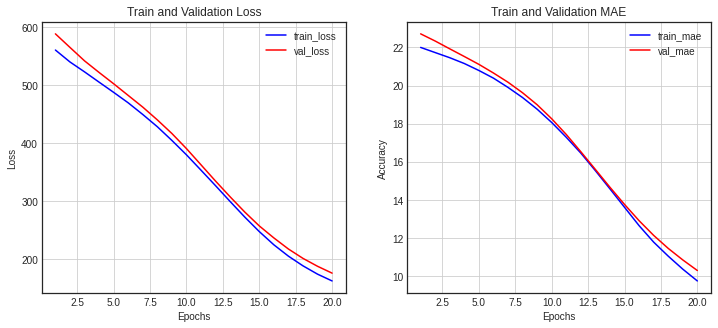

In [13]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 171.3474 - mae: 10.4193
[171.3473663330078, 10.419344902038574]
(102,)
(102,)


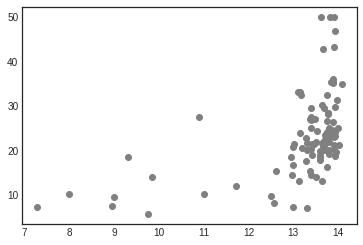

In [14]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
import matplotlib.pyplot as plt

print(model.evaluate(x_test, y_test))

y_pred = model.predict(x_test)
y_pred = y_pred.reshape(-1)

print(y_test.shape)
print(y_pred.shape)
plt.figure()
plt.scatter(y_pred, y_test, color = "grey", marker = "o", label = "label")
plt.show()

## 10-3 Reuters 딥러닝 모델

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [21]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (test_data, test_label) = reuters.load_data(num_words = 10000)
(train_data, val_data, train_label, val_label) = train_test_split(x_train_full, y_train_full,
                                        test_size = 0.25, random_state = 2023)
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_label)))

6736
2246
2246
46


In [23]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))

  for i, d in enumerate(data):
    results[i, d] = 1.
  
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_label)
y_val = utils.to_categorical(val_label)
y_test = utils.to_categorical(test_label)


In [31]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(128, input_shape = (10000, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dense(128))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 46)                5934      
Total params: 1,303,086
Trainable params: 1,302,830
Non-trainable params: 256
__________________________________________

In [33]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint('reuters_model.h5', save_best_only = True)
early_stopping_cb = callbacks.EarlyStopping(patience = 10, monitor = 'val_loss',
                                            restore_best_weights = True)
history = model.fit(x_train, y_train,
                  epochs = 40,
                  batch_size = 32,
                  validation_data = (x_val, y_val),
                  callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/40
211/211 [==============================] - 2s 6ms/step - loss: 1.4104 - accuracy: 0.7098 - val_loss: 1.0804 - val_accuracy: 0.8068
Epoch 2/40
211/211 [==============================] - 1s 4ms/step - loss: 0.6082 - accuracy: 0.8670 - val_loss: 0.9346 - val_accuracy: 0.8099
Epoch 3/40
211/211 [==============================] - 1s 4ms/step - loss: 0.4201 - accuracy: 0.9146 - val_loss: 0.9522 - val_accuracy: 0.8166
Epoch 4/40
211/211 [==============================] - 1s 4ms/step - loss: 0.3308 - accuracy: 0.9316 - val_loss: 1.0205 - val_accuracy: 0.8134
Epoch 5/40
211/211 [==============================] - 1s 4ms/step - loss: 0.2923 - accuracy: 0.9424 - val_loss: 1.0402 - val_accuracy: 0.8175
Epoch 6/40
211/211 [==============================] - 1s 4ms/step - loss: 0.2663 - accuracy: 0.9477 - val_loss: 1.0447 - val_accuracy: 0.8121
Epoch 7/40
211/211 [==============================] - 1s 4ms/step - loss: 0.2532 - accuracy: 0.9488 - val_loss: 1.0556 - val_accuracy: 0.8085
Epoch 

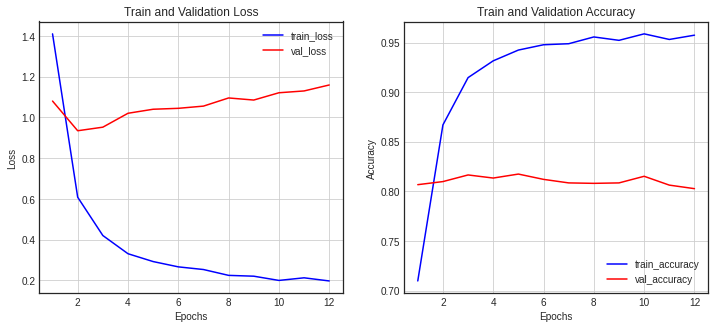

In [34]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [35]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0223 - accuracy: 0.7943


[1.0222852230072021, 0.7943009734153748]

## 10-4. CIFAR10 딥러닝 모델

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [47]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
(x_train, x_val, y_train, y_val) = train_test_split(x_train_full, y_train_full,
                                        test_size = 0.25, random_state = 2023)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (37500, 32, 32, 3) 레이블: (37500, 1)
검증 데이터: (12500, 32, 32, 3) 레이블: (12500, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [48]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [49]:
len(x_train[0])

32

In [52]:
y_train.shape

(37500, 1)

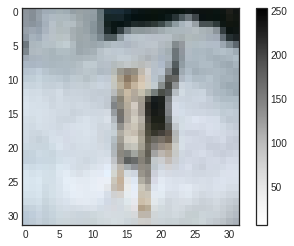

In [53]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [54]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(37500, 32, 32, 3)
(12500, 32, 32, 3)
(10000, 32, 32, 3)


In [55]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(37500, 3072)
(12500, 3072)
(10000, 3072)


In [56]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [57]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(2048, input_shape = (32 * 32 * 3, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = "softmax"))

model.compile(optimizer = 'Adam',
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_3 (Activation)    (None, 1024)             

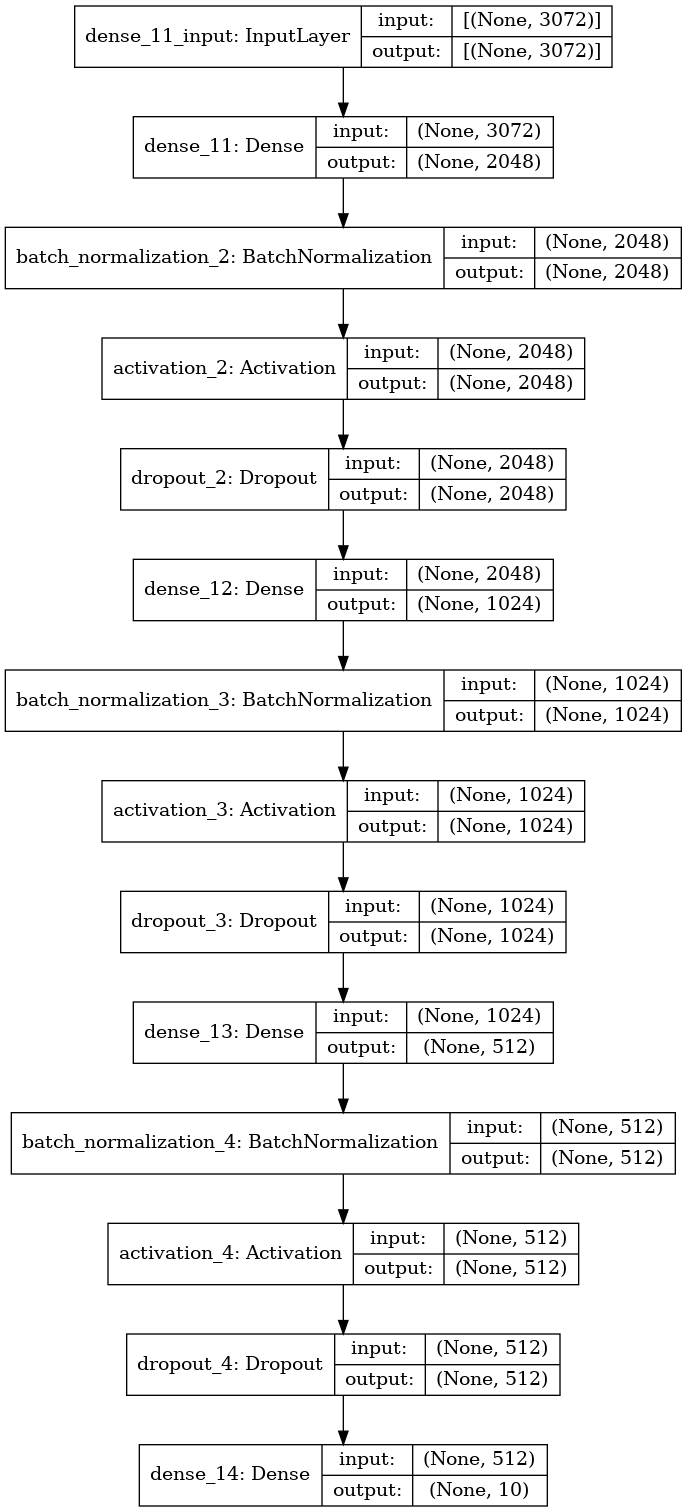

In [59]:
utils.plot_model(model, show_shapes=True)

In [60]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint('cifa10_model.h5', save_best_only = True)
early_stopping_cb = callbacks.EarlyStopping(patience = 10, monitor = 'val_loss',
                                            restore_best_weights = True)

history = model.fit(x_train, y_train,
                    epochs = 50,
                    batch_size = 64,
                    validation_data = (x_test, y_test),
                    callbacks = [checkpoint_cb, early_stopping_cb])


Epoch 1/50
586/586 [==============================] - 7s 9ms/step - loss: 2.0684 - accuracy: 0.3069 - val_loss: 1.7527 - val_accuracy: 0.3760
Epoch 2/50
586/586 [==============================] - 5s 8ms/step - loss: 1.7304 - accuracy: 0.3833 - val_loss: 1.7179 - val_accuracy: 0.3932
Epoch 3/50
586/586 [==============================] - 5s 8ms/step - loss: 1.6410 - accuracy: 0.4157 - val_loss: 1.6375 - val_accuracy: 0.4093
Epoch 4/50
586/586 [==============================] - 5s 8ms/step - loss: 1.5889 - accuracy: 0.4333 - val_loss: 1.6264 - val_accuracy: 0.4082
Epoch 5/50
586/586 [==============================] - 5s 8ms/step - loss: 1.5553 - accuracy: 0.4467 - val_loss: 1.5603 - val_accuracy: 0.4479
Epoch 6/50
586/586 [==============================] - 5s 8ms/step - loss: 1.5239 - accuracy: 0.4570 - val_loss: 1.5731 - val_accuracy: 0.4368
Epoch 7/50
586/586 [==============================] - 5s 8ms/step - loss: 1.5038 - accuracy: 0.4610 - val_loss: 1.4897 - val_accuracy: 0.4712
Epoch 

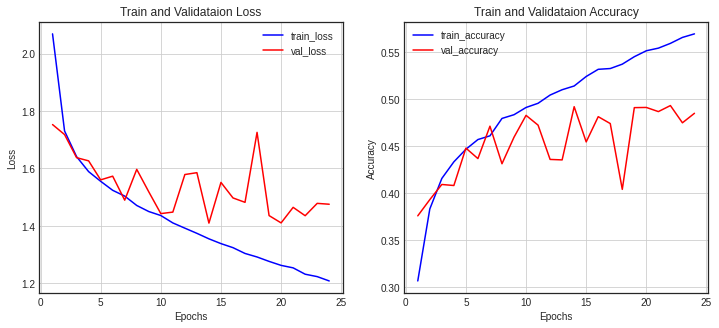

In [61]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
hist_dict = history.history

loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
accuracy = hist_dict['accuracy']
val_accuracy = hist_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label = "train_loss")
ax1.plot(epochs, val_loss, 'r-', label = "val_loss")
ax1.set_title('Train and Validataion Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, accuracy, 'b-', label = "train_accuracy")
ax1.plot(epochs, val_accuracy, 'r-', label = "val_accuracy")
ax1.set_title('Train and Validataion Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid()
ax1.legend()

plt.show()

In [62]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4098 - accuracy: 0.4919


[1.4097532033920288, 0.4918999969959259]

## 보너스 stage : CNN을 이용하여 CIFAR10 분석

In [70]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [71]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
(x_train, x_val, y_train, y_val) = train_test_split(x_train_full, y_train_full,
                                        test_size = 0.25, random_state = 2023)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (37500, 32, 32, 3) 레이블: (37500, 1)
검증 데이터: (12500, 32, 32, 3) 레이블: (12500, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [72]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [73]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [82]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
n_channel_1=64
n_channel_2=128
n_channel_3=128
n_dense_1= 128
n_dense_2 = 64
n_train_epoch=40

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), 
                              activation='relu', 
                              input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='elu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='elu'))
model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense_1))
model.add(keras.layers.BatchNormalization())  # Batch Normalization
model.add(layers.Activation('elu'))
model.add(keras.layers.Dense(n_dense_2))
model.add(keras.layers.BatchNormalization())  # Batch Normalization
model.add(layers.Activation('elu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [83]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [84]:
early_stopping_cb = callbacks.EarlyStopping(patience = 10, monitor = 'val_loss',
                                            restore_best_weights = True)

history = model.fit(x_train, y_train, 
                    epochs= n_train_epoch, 
                    batch_size = 32, 
                    validation_data=(x_val, y_val),
                    callbacks = [early_stopping_cb])


Epoch 1/40
1172/1172 [==============================] - 8s 6ms/step - loss: 1.5543 - accuracy: 0.4553 - val_loss: 1.4275 - val_accuracy: 0.5002
Epoch 2/40
1172/1172 [==============================] - 7s 6ms/step - loss: 1.1730 - accuracy: 0.5922 - val_loss: 1.3464 - val_accuracy: 0.5486
Epoch 3/40
1172/1172 [==============================] - 7s 6ms/step - loss: 1.0200 - accuracy: 0.6462 - val_loss: 1.0956 - val_accuracy: 0.6070
Epoch 4/40
1172/1172 [==============================] - 7s 6ms/step - loss: 0.9037 - accuracy: 0.6904 - val_loss: 1.2207 - val_accuracy: 0.5740
Epoch 5/40
1172/1172 [==============================] - 7s 6ms/step - loss: 0.8017 - accuracy: 0.7278 - val_loss: 0.9104 - val_accuracy: 0.6853
Epoch 6/40
1172/1172 [==============================] - 7s 6ms/step - loss: 0.7214 - accuracy: 0.7545 - val_loss: 1.3169 - val_accuracy: 0.5839
Epoch 7/40
1172/1172 [==============================] - 7s 6ms/step - loss: 0.6478 - accuracy: 0.7805 - val_loss: 0.8874 - val_accuracy:

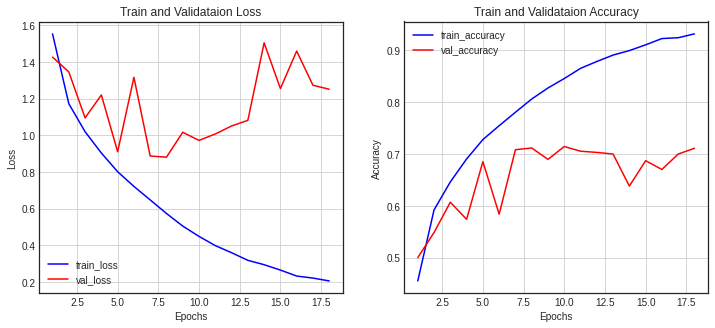

In [85]:
hist_dict = history.history

loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
accuracy = hist_dict['accuracy']
val_accuracy = hist_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label = "train_loss")
ax1.plot(epochs, val_loss, 'r-', label = "val_loss")
ax1.set_title('Train and Validataion Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, accuracy, 'b-', label = "train_accuracy")
ax1.plot(epochs, val_accuracy, 'r-', label = "val_accuracy")
ax1.set_title('Train and Validataion Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.grid()
ax1.legend()

plt.show()

In [86]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8842 - accuracy: 0.7063


[0.8842432498931885, 0.7063000202178955]

# README

- 작성자 : 이혁희

## 개요
- 다음과 같이 4개의 모델을 분석 하였습니다.(CIFAR10 CNN 모델은 딥러닝 모델의 예측력이 너무 약해서 CNN 모델은 어떨까 싶어서 분석해 보았습니다.)
    - Boston 주택가격모델 : [29.61016082763672, 4.254533767700195]
    - Reuters 딥러닝 모델 : [1.0222852230072021, 0.7943009734153748]
    - CIFAR10 딥러닝 모델 : [1.4097532033920288, 0.4918999969959259]
    - CIFAR10 CNN 모델 : [0.8842432498931885, 0.7063000202178955]

- 학습 방법에 대하여
    - 과적합 방지를 위한 Dropout의 효과는 잘 모르겠지만, BatchNormalization을 했을 때 학습속도가 빨라지는 것은 확인할 수 있었습니다.
    - BatchNormalization과 EarlyStopping을 이용해서 학습시 과적합 되기전에 학습을 중단하는 것이 매우 유용했습니다.

- 학습 결과에 대하여
    - Boston 주택가격과 Reuter 모델은 DNN을 썼고 데이터 양이 그렇게 많지 않은 것에 비하면 예측력이 매우 인상적이었습니다.
    - CIFAR10 데이터를 딥러닝으로 분석했을 때는 예측력이 없었지만, CNN으로 학습했을 때는 70%의 테스트 정확도를 보였습니다.(LeNet 구성을 거의 그대로 사용) CNN이 이미지를 인식하는데 매우 유리함을 알았습니다.



## Boston 주택가격 예측 모델
1. 모델 서머리

```
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
=================================================================
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
```
2. loss, accuracy history
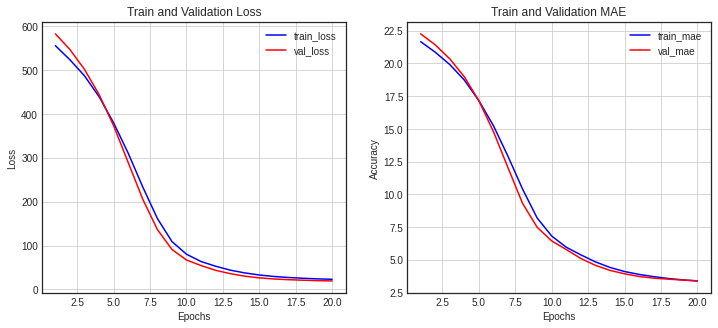

3. 주택 예측과 레이블 비교
    - 주택 예측은 회귀 모델이라 MSE을 메트릭으로 선택하였습니다. 직관적으로 예측의 정확도를 확인하기 위해서 레이블과 예측치를 x, y축에 놓고 scatter plot를 하였습니다.
    - 둘 간에 우상향하는 선형 상관관계를 보이고 있습니다.
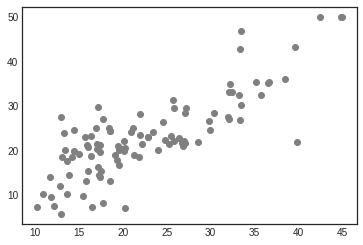


## Reuters 딥러닝 모델
```
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_8 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 46)                5934      
=================================================================
Total params: 1,303,086
Trainable params: 1,302,830
Non-trainable params: 256
```
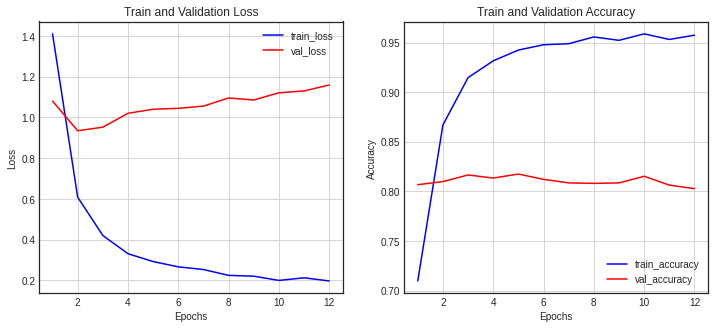

## CIFAR10 딥러닝 모델
```
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_11 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
activation_2 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_3 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
=================================================================
Total params: 8,935,946
Trainable params: 8,928,778
Non-trainable params: 7,168
```
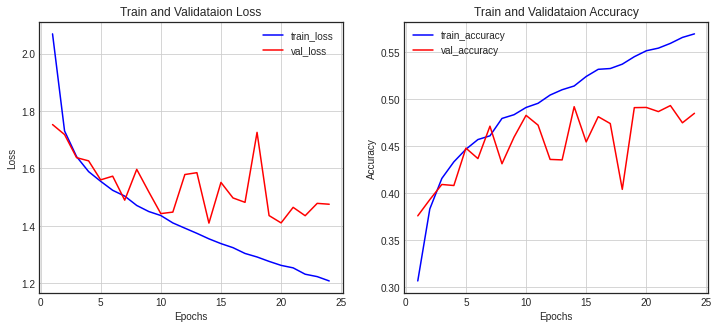

## CNN을 이용한 CIFAR10 분석
```
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
=================================================================
Total params: 298,570
Trainable params: 298,186
Non-trainable params: 384
```
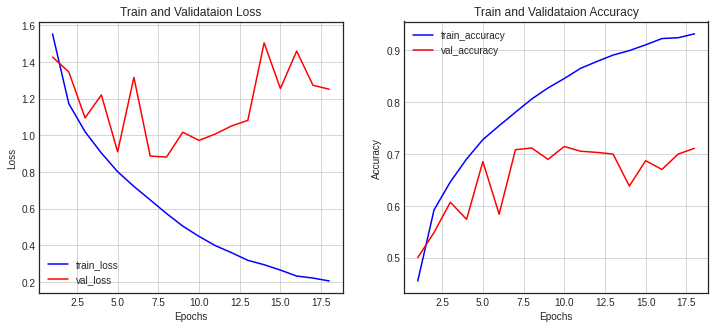